<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [27]:
# !pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

Processing c:\users\sergio nava\documentos\github\ingeotec\compstats
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for CompStats: filename=CompStats-0.0.8-py3-none-any.whl size=24240 sha256=f92d9c2c77195a7f5475f0b5c6acb0862f907d9e1d00e09cfefe1cdb37a24f7f
  Stored in directory: C:\Users\Sergio Nava\AppData\Local\Temp\pip-ephem-wheel-cache-xfe_5xc1\wheels\19\3d\47\ac1dd586fda7dec78f516b825f8dc8d5f94f7a7b7820cd22b0
Successfully built CompStats
  Attempting uninstall: CompStats
    Found existing installation: CompStats 0.0.7
    Uninstalling CompStats-0.0.7:
      Successfully uninstalled CompStats-0.0.7
Note: you may need to restart the kernel to use updated packages.


First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [26]:
try:
  import CompStats
except ImportError:
  %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
    #!pip install Compstats
    # !pip install -U git+https://github.com/INGEOTEC/CompStats@develop

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance` function is used to calculate and analyze the performance of machine learning models. On the other hand, the `plot_performance` function visualizes the performance metrics calculated by `performance`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference` and `plot_difference`; `difference` assesses the differences in performance between models in comparison to the best system, and `plot_difference` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [4]:
from CompStats import performance, plot_performance
from CompStats import difference, plot_difference
from CompStats import all_differences, difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#plt.style.use('_mpl-gallery')

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
DATA = 'exist_task1_en_l.csv'

`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [6]:
df = pd.read_csv(DATA)

The first five rows of `df` are shown below. It can be observed that the first column contains the gold standard, identified with `y`, and the rest of the columns are the predictions performed by different systems.

In [7]:
df.tail(5)

,y,task1.SINAI.TL.3,task1.multiaztertest.1,task1.AI.UPV.1,task1.free.1,task1.zk.1,task1.LHZ.1,task1.nlp.uned.team.1,task1.GuillemGSubies.1,task1.AIT.FHSTP.2,task1.IREL.hatespeech.group.3
2203,non-sexist,non-sexist,non-sexist,sexist,non-sexist,non-sexist,sexist,non-sexist,non-sexist,non-sexist,non-sexist
2204,non-sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist
2205,sexist,sexist,sexist,sexist,non-sexist,sexist,sexist,sexist,non-sexist,sexist,sexist
2206,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist
2207,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,non-sexist,sexist,sexist


In [8]:
df

,y,task1.SINAI.TL.3,task1.multiaztertest.1,task1.AI.UPV.1,task1.free.1,task1.zk.1,task1.LHZ.1,task1.nlp.uned.team.1,task1.GuillemGSubies.1,task1.AIT.FHSTP.2,task1.IREL.hatespeech.group.3
0,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist
1,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist
2,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist
3,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist
4,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist
...,...,...,...,...,...,...,...,...,...,...,...
2203,non-sexist,non-sexist,non-sexist,sexist,non-sexist,non-sexist,sexist,non-sexist,non-sexist,non-sexist,non-sexist
2204,non-sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist,sexist
2205,sexist,sexist,sexist,sexist,non-sexist,sexist,sexist,sexist,non-sexist,sexist,sexist
2206,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist,non-sexist


In [9]:

# Obtener una lista de categorías únicas (asumiendo que todas las columnas comparten las mismas categorías)
# Aquí se asume que las categorías son cadenas de texto y se ignoran los valores nulos
categorias = pd.unique(df.dropna().values.ravel('K'))

# Derretir el DataFrame para obtener una tabla de dos columnas: 'variable' y 'value'
df_melted = df.melt(var_name='Columna', value_name='Categoria')

# Contar la frecuencia de cada categoría en cada columna usando crosstab
frecuencia_categorias = pd.crosstab(df_melted['Columna'], df_melted['Categoria'])

# Asegurarse de que todas las categorías estén presentes en la tabla de frecuencia
# Esto agrega cualquier categoría faltante con frecuencia 0
frecuencia_categorias = frecuencia_categorias.reindex(columns=categorias, fill_value=0)

# Mostrar la tabla de frecuencias
print(frecuencia_categorias)


Categoria                      non-sexist  sexist
Columna                                          
task1.AI.UPV.1                       1013    1195
task1.AIT.FHSTP.2                    1003    1205
task1.GuillemGSubies.1               1053    1155
task1.IREL.hatespeech.group.3        1011    1197
task1.LHZ.1                           929    1279
task1.SINAI.TL.3                      926    1282
task1.free.1                         1047    1161
task1.multiaztertest.1                920    1288
task1.nlp.uned.team.1                 884    1324
task1.zk.1                            998    1210
y                                    1050    1158


# Performance Anaylisis

Let us start with the performance analysis of the different systems. The performance metric used is the weighted average F1 score. This performance is coded in the variable `score` as observed in the next instruction.

In [10]:
score = lambda y, hy: accuracy_score(y, hy)

The next step is to compute the performance on the bootstrap samples; this is done with the function `performance`. The function has a few parameters; one is the `score`, which receives the metric used to measure the performance.

In [11]:
perf = performance(df, score=score,num_samples=1000)

100%|██████████| 11/11 [00:20<00:00,  1.84s/it]


`perf` is an instance of `StatisticSamples`, the bootstrap samples can be seen on the property `calls`. The first five bootstrap samples of the performance of INGEOTEC are shown below. -- It verifies that the key is in the dictionary in case the dataset has been changed. --

In [12]:
if 'task1.SINAI.TL.3' in perf.calls:
  print(f"{perf.calls['task1.SINAI.TL.3'][:5]}")

[0.77807971 0.76313406 0.77581522 0.77400362 0.76856884]


The performance of the systems, along with their confidence intervals, can be seen using the next instruction.

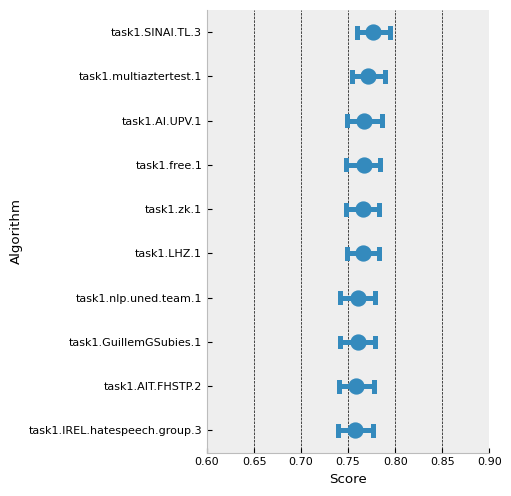

In [13]:
import matplotlib as mpl
plt.style.use('bmh')

#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

mpl.rcParams['font.size'] = 8
mpl.rcParams['grid.color'] = "black"
# Generar el gráfico de rendimiento
face_grid = plot_performance(perf)

# Ajustar los límites del eje X
face_grid.set(xlim=(0.6, 0.9))

# Mostrar el gráfico
plt.show()

It can be observed that the best system is INGEOTEC. Although the confidence intervals provide information that helps to assess the difference in the performance of the systems, in this case, the intervals intersect. Therefore, one needs another statistical tool to determine if the difference in performance is significant.

# Performance Comparison against the Winner

The difference in their performance compared to the best-performing system can be used to compare the algorithms analyzed. The function `difference` computes the difference as shown below.

In [14]:
diff = difference(perf)

`diff` is an instance of `StatisticSamples`; one can find the best system on the property `info`, as the following instruction shows.

In [15]:
diff.info

{'best': 'task1.SINAI.TL.3'}

The difference in performance can be visualized with the following instruction.

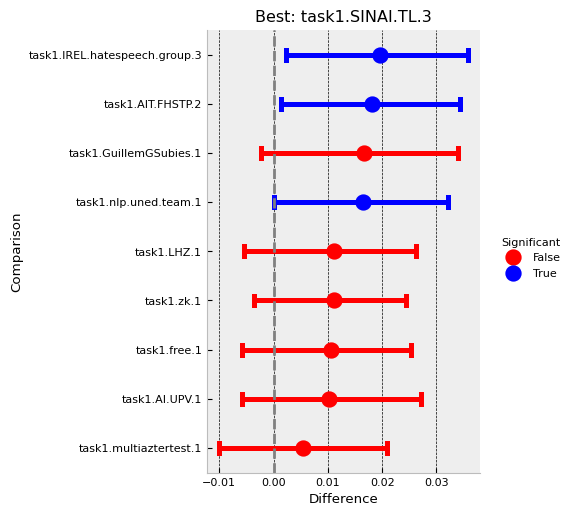

In [16]:
face_grid_diff = plot_difference(diff)

From the performance graphs, for this example, we can observe that the ranking is *INGEOTEC*, *BoW*, *StackBoW*, *BoW (Corpus)*, *Dense*, *Bow (Class Weight)*. Hence, in the last graph, we analyze the performance difference against the winner (INGEOTEC). From this graph, we can conclude that *BoW* and *StackBoW*, might perform similarly to INGEOTEC.

Should we test the hypothesis of equality versus difference, considering that one system outperforms the other in the test? To address this question, we compare the performance of two systems, $A$ and $B$, to determine whether $A$ is superior to $B$ in a larger data population, represented as $\theta_A > \theta_B$. We can estimate the p-value associated with the hypothesis test $H_0: \theta_A \le \theta_B$ vs $H_1: \theta_A > \theta_B$ given the data, equivalently $H_0: \theta_A< -  \theta_B\le 0$ vs $H_1: \theta_A - \theta_B > 0$. The p-values for these differences can be estimated using the following instruction, comparing them against the winner (INGEOTEC) to determine the probability that $a$ (INGEOTEC) is better than $b$.

The `difference_p_value` function estimates the p-value for each difference in comparison to the best system, as illustrated below.


In [17]:
p_values = difference_p_value(diff)

For a given $\alpha$ level, p-values smaller than $\alpha$  are significant, meaning the observed difference is unlikely to be due to chance. An $\alpha$ level of 0.05 is commonly used.

In [18]:
p_values

{'task1.IREL.hatespeech.group.3': 0.007,
 'task1.AIT.FHSTP.2': 0.016,
 'task1.GuillemGSubies.1': 0.031,
 'task1.nlp.uned.team.1': 0.021,
 'task1.LHZ.1': 0.086,
 'task1.zk.1': 0.064,
 'task1.free.1': 0.096,
 'task1.AI.UPV.1': 0.099,
 'task1.multiaztertest.1': 0.25}

In [19]:
result = multipletests(list(p_values.values()), method='bonferroni')
p_valuesC = dict(zip(p_values.keys(),result[1]))
p_valuesC

{'task1.IREL.hatespeech.group.3': 0.063,
 'task1.AIT.FHSTP.2': 0.14400000000000002,
 'task1.GuillemGSubies.1': 0.279,
 'task1.nlp.uned.team.1': 0.189,
 'task1.LHZ.1': 0.7739999999999999,
 'task1.zk.1': 0.5760000000000001,
 'task1.free.1': 0.864,
 'task1.AI.UPV.1': 0.891,
 'task1.multiaztertest.1': 1.0}

# Performance comparison between all models

Similarly, the differences for each pair of variables between all models can be estimated using the function `all_differences`, as illustrated in the following instructions. This approach allows for a comprehensive analysis of how each model compares to the others, providing a statistical basis to understand the significance of performance variations among them. This method extends the comparative analysis, offering a detailed view of the competitive landscape of model performance.

In [20]:
all_diff = all_differences(perf)

Once again, we use the function `difference_p_value` to estimate the p-value.

In [21]:
p_values = difference_p_value(all_diff)

And we can analyze from all pairs of systems individually which ones have significantly different performances by comparing their p-value with $\alpha$.

In [22]:
p_values

{'task1.SINAI.TL.3 - task1.multiaztertest.1': 0.25,
 'task1.SINAI.TL.3 - task1.AI.UPV.1': 0.099,
 'task1.SINAI.TL.3 - task1.free.1': 0.096,
 'task1.SINAI.TL.3 - task1.zk.1': 0.064,
 'task1.SINAI.TL.3 - task1.LHZ.1': 0.086,
 'task1.SINAI.TL.3 - task1.nlp.uned.team.1': 0.021,
 'task1.SINAI.TL.3 - task1.GuillemGSubies.1': 0.031,
 'task1.SINAI.TL.3 - task1.AIT.FHSTP.2': 0.016,
 'task1.SINAI.TL.3 - task1.IREL.hatespeech.group.3': 0.007,
 'task1.multiaztertest.1 - task1.AI.UPV.1': 0.238,
 'task1.multiaztertest.1 - task1.free.1': 0.277,
 'task1.multiaztertest.1 - task1.zk.1': 0.205,
 'task1.multiaztertest.1 - task1.LHZ.1': 0.236,
 'task1.multiaztertest.1 - task1.nlp.uned.team.1': 0.102,
 'task1.multiaztertest.1 - task1.GuillemGSubies.1': 0.09,
 'task1.multiaztertest.1 - task1.AIT.FHSTP.2': 0.067,
 'task1.multiaztertest.1 - task1.IREL.hatespeech.group.3': 0.047,
 'task1.AI.UPV.1 - task1.free.1': 0.481,
 'task1.AI.UPV.1 - task1.zk.1': 0.456,
 'task1.AI.UPV.1 - task1.LHZ.1': 0.447,
 'task1.AI.UP

When conducting numerous comparisons or hypothesis tests on a dataset, the risk of incurring Type I errors (incorrectly dismissing a valid null hypothesis) increases. This happens because more tests performed increase the probability of randomly identifying statistically significant outcomes. Implementing adjustments for multiple comparisons is critical for several reasons: (1) To manage the risk of Type I Error, (2) To prevent erroneous conclusions, and (3) To uphold the integrity of the research.

The following code illustrates the effect of these methods for multiple comparison corrections. The function `multipletests` makes the p-value correction by selecting the parameter `method`. In this example, the Bonferroni correction method is used.

In [23]:
result = multipletests(list(p_values.values()), method='bonferroni')

`result` is an array; next, we convert it back into a dictionary.

In [24]:
p_valuesC = dict(zip(p_values.keys(),result[1]))

And we can analyze from all pairs of systems simunstally which ones have significantly different performances by comparing their p-value with $\alpha$.

In [25]:
p_valuesC

{'task1.SINAI.TL.3 - task1.multiaztertest.1': 1.0,
 'task1.SINAI.TL.3 - task1.AI.UPV.1': 1.0,
 'task1.SINAI.TL.3 - task1.free.1': 1.0,
 'task1.SINAI.TL.3 - task1.zk.1': 1.0,
 'task1.SINAI.TL.3 - task1.LHZ.1': 1.0,
 'task1.SINAI.TL.3 - task1.nlp.uned.team.1': 0.9450000000000001,
 'task1.SINAI.TL.3 - task1.GuillemGSubies.1': 1.0,
 'task1.SINAI.TL.3 - task1.AIT.FHSTP.2': 0.72,
 'task1.SINAI.TL.3 - task1.IREL.hatespeech.group.3': 0.315,
 'task1.multiaztertest.1 - task1.AI.UPV.1': 1.0,
 'task1.multiaztertest.1 - task1.free.1': 1.0,
 'task1.multiaztertest.1 - task1.zk.1': 1.0,
 'task1.multiaztertest.1 - task1.LHZ.1': 1.0,
 'task1.multiaztertest.1 - task1.nlp.uned.team.1': 1.0,
 'task1.multiaztertest.1 - task1.GuillemGSubies.1': 1.0,
 'task1.multiaztertest.1 - task1.AIT.FHSTP.2': 1.0,
 'task1.multiaztertest.1 - task1.IREL.hatespeech.group.3': 1.0,
 'task1.AI.UPV.1 - task1.free.1': 1.0,
 'task1.AI.UPV.1 - task1.zk.1': 1.0,
 'task1.AI.UPV.1 - task1.LHZ.1': 1.0,
 'task1.AI.UPV.1 - task1.nlp.uned